<a href="https://colab.research.google.com/github/Nabajyoti4/Sarcasm-product-review/blob/main/Product_Review_Sarcasm_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NLP Product Review Sarcasm Detection

* **Problem statement**
 * Sarcasm detection in today’s environment, opinion is a crucial denominator. Customers can openly share how they feel about your products on social media and other digital platforms. Therefore, today’s businesses want to track online mentions of their brand.


* **Dataset**
 * Amazon review dataset , with 468 sarcasm reviewws and 468 normal reviews

* **Our Solution**
 * Compare machine learning algorithm Naive Byes with deep learning solutions in NLP like RNN with LSTM and bidrectional layers. And Transer learning from HUB with pre word embeddings on 512 dimension


* **Future Prespective**
 * More Data needed to acheive more higher accuracy near 90 above

### Imports

In [1]:
import tensorflow as tf
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline

### Dataset Read

In [2]:
dataset = pd.read_csv("/content/drive/MyDrive/NLP Assignment for Sarcasm Classification/BalanceData.csv",
                      index_col=None)

In [3]:
dataset.head()

,Label,Comment
0,1,"I can not believe my eyes, or my ears.... The ..."
1,1,Journalist Weisberg here cashes in on the curr...
2,1,When my friend purchased and forced me to watc...
3,1,Does the publisher seriously think anyone is g...
4,1,This toy would be a lot more realistic with ab...


### Data Visulization

#### 1. Data info

In [4]:
dataset.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937 entries, 0 to 936
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    937 non-null    int64 
 1   Comment  937 non-null    object
dtypes: int64(1), object(1)
memory usage: 14.8+ KB


#### 2. Data wordcloud 

In [ ]:
def wordcloud_generate(data, filter):
  """Create word cloud from the given text data to display the frequency of 
  words

  Params:
  data (list) : List of all the comments 
  filter (int) :  Label to filter (0 = ironic, 1 = regular)
  """

  # Filter the comments based on the ironic or regular
  comments = " ".join(
                      data['Comment'][i] 
                      for i in range(0, len(data))
                      if data['Label'][i] == filter
                      )
  
  # display total words in the filtered comments
  print ("There are {} words in the combination of all review.".format(len(comments)))

  # filter all unique stopwrds from stopwords library
  stopwords = set(STOPWORDS)

  # create a wordcloud with frequency of all words
  wordcloud = WordCloud(stopwords=stopwords).generate(comments)


  plt.figure(figsize=(20,30))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

There are 546495 words in the combination of all review.


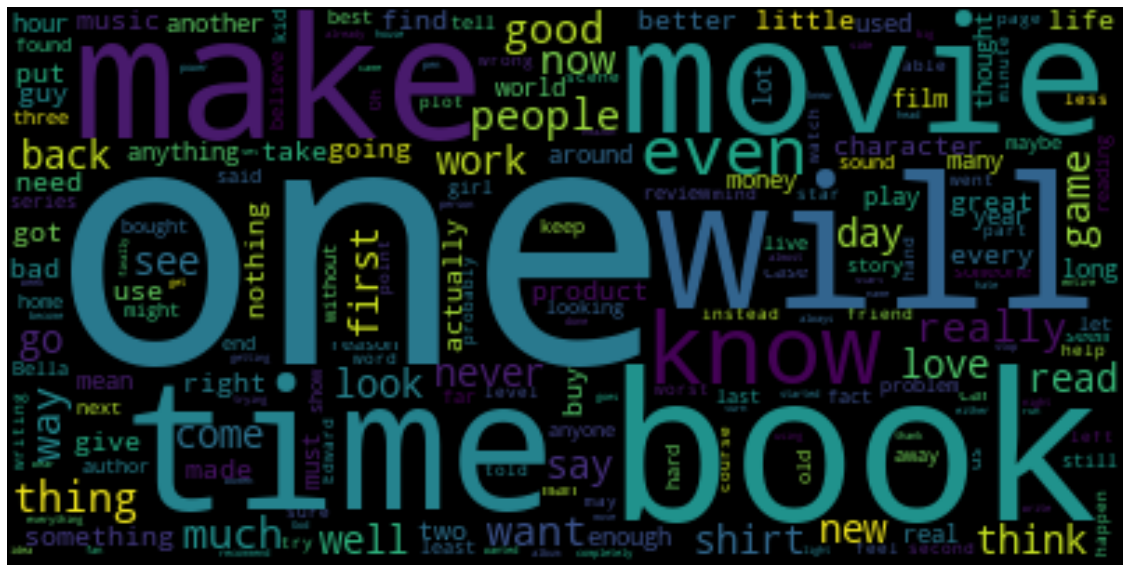

In [ ]:
wordcloud_generate(dataset, 1)

There are 664518 words in the combination of all review.


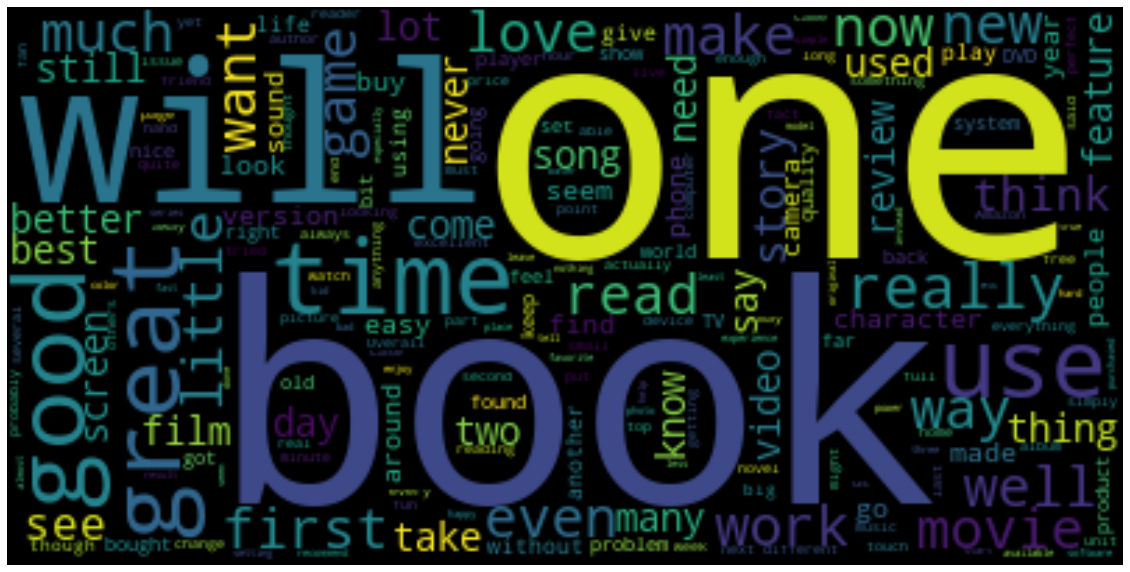

In [ ]:
wordcloud_generate(dataset, 0)

### Train and Validation Split

In [5]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split training data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(dataset["Comment"].to_numpy(),
                                                                            dataset["Label"].to_numpy(),
                                                                            test_size=0.1, # 10% of samples to validation set
                                                                            random_state=42) 

In [6]:
# Check the lengths
len(train_sentences), len(train_labels), len(val_sentences), len(val_labels)

(843, 843, 94, 94)

In [7]:
print(f"Train sentence : {train_sentences[0]}")
print(f"Train Label : {train_labels[0]}")
print(f"Validation sentence : {val_sentences[0]}")
print(f"Validation Label : {val_labels[0]}")

Train sentence : Sometimes a novel that jumps back and forth in time works and sometimes it doesn't. I found this book very difficult to read and didn't enjoy it at all.
Train Label : 0
Validation sentence : This is atrocious.  I'm watching "Life" on Discovery channel right now, with Oprah narrating.  Some of the reviewers said that the script was re-written for her, and I can believe it.  I can't believe Attenborough saying lines like "hunting crab seals is toooo much work!"  Oprah narrates this thing as if she were reading a bedtime story to little kids and comes off as snarky and condescending.  In the opening segment, she's discussing a fox chasing an ibex kid and it's basically like "heeeere comes the fox!  UH OH!!"  The most embarrassing thing is that I'm thinking that British people think that Americans demanded this.  Who's going to be doing the next special, Dr. Phil?  "Oh-kaaay, here comes the alee-gaytor, it's prey tries to run, but that neeeever works!  HAW HAW HAW!"  Don't

### Converting text to numbers

#### 1.Text vectorization (tokenization)

In [8]:
# Find average number of (words) in training data
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

236

In [9]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = None # choose the unique words on its own
max_length = 236

# Use the default TextVectorization
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=max_length, # how long should the output sequence of tokens be?
                                 )

In [10]:
print(text_vectorizer)

In [14]:
# Fit the text vectorizer to the training set
text_vectorizer.adapt(train_sentences)

In [15]:
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common words
bottom_5_words = words_in_vocab[-5:] # least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 17735
Top 5 most common words: ['', '[UNK]', 'the', 'and', 'to']
Bottom 5 least common words: ['020', '01this', '005', '\x1aconscience\x1a', '\x1abeast\x1a']


In [16]:
# test the vectorizer on random train sentences
import random
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
        \nText length : {len(random_sentence)}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
Try, if you can, to put to one side GaGa's irritating self-obsession and her ridiculous delusion that she's somehow in on a 'party' and is 'sharing it' with us lowly non-famous people, and let's look at the album on it's own merits. Surely it can't be THAT bad, right? She has credentials, after all. She's worked with some respectable collaborators, after all. She can hold a note, after all.  Sadly, none of this seems to have counted for much at all. What we have here is the very worst pop sludge, making it's ugly way off the predictable, unoriginal treadmill of weak pop music and into the mindset of the hysterical masses, whose purchases and subsequent success of that which they purchase fool both consumer and artist alike into attributing far more quality to a product like this than it actually warrants.  Put simply, this is rubbish. Over indulgent, shallow and completely inconsequential rubbish of the kind we'll look back at in five years time and wonder what on earth 

<tf.Tensor: shape=(1, 236), dtype=int64, numpy=
array([[  321,    28,    13,    39,     4,   182,     4,    30,   333,
         7640,  4244, 10682,     3,    48,  2366,  8010,    12,   502,
         1085,    10,    16,     5,   845,     3,     8,  2944,     9,
           15,   195, 12971, 12263,    97,     3,   471,   178,    29,
            2,   287,    16,    31,   146,  3522,  2109,     9,   149,
           23,    12,   174,   127,    64,    42, 15751,    91,    26,
          502,   579,    15,    60,  5003, 16007,    91,    26,    64,
           39,   602,     5,   586,    91,    26,  2630,  1003,     7,
           11,   226,     4,    21,  8105,    14,    72,    29,    26,
           53,    66,    21,   163,     8,     2,    58,   486,  1289,
        10398,   437,    31,  1422,    90,   109,     2,  1794,  9255,
         3331,     7,  1132,  1289,   166,     3,    79,     2,  5262,
            7,     2,  7469,  7206,  1076,  2379,     3,  2329,  1140,
            7,    12,    71, 

### 2.Embedding Layer

In [17]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=17735, # set input shape
                             output_dim=128, # set size of embedding vector, set this to divisble by 8
                             embeddings_initializer="uniform",
                             input_length=236) # how long is each input

embedding

In [18]:
# Get a random sentence from training set
random_sentence = random.choice(train_sentences)
print(f"Original text:\n{random_sentence}\
  \nText length : {len(random_sentence)}\
      \n\nEmbedded version:")

# Embed the random sentence
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
First for the drawbacks; 1)It is easy to lose the balls if you don't make a point of collecting them after play and keeping them somewhere safe, 2)There is music that plays continuously while it is on, which can be annoying for some, and 3)The play cycle is rather short so you or baby must keep pressing plunger to start it again.  This might be a welcome respite for those offended by #2. BUT: All four of my boys LOVED this toy!!!  A favorite, and a toy I always buy or recommend to others.  Perfect for a boy or girl.  My boys were enthralled by the colorful balls shooting out of the hole and amazed when they almost always went where they were supposed to, which is around the ramp and back into the receptacle.  They also LOVED to feel the air blow out of the toy (the air is what pushes the ball up and out of the hole) and would often just press the plunger to feel the air on their faces, hands and in their hair.  They quickly learned to start the toy themselves and would b

<tf.Tensor: shape=(1, 236, 128), dtype=float32, numpy=
array([[[ 0.03633777,  0.01712539, -0.00960852, ...,  0.02950445,
          0.0175588 , -0.02564353],
        [ 0.02685494,  0.03719005,  0.0076276 , ...,  0.04517077,
         -0.02446039, -0.02700531],
        [-0.01189305,  0.03432702,  0.04011074, ...,  0.03311509,
          0.02090322,  0.01213914],
        ...,
        [ 0.04474542, -0.01543302,  0.04447646, ..., -0.02254676,
         -0.03172581, -0.01081537],
        [-0.03692268,  0.03395047, -0.0230575 , ...,  0.03683405,
          0.04205884,  0.04275862],
        [-0.00499315,  0.03896035, -0.02335664, ...,  0.03336674,
          0.04849515, -0.01824081]]], dtype=float32)>

### 3.Model 

#### 1.1 Naive Byes

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_naive_byes = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_naive_byes.fit(train_sentences, train_labels)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

#### 1.2 Evaluation

In [20]:
# Model score
baseline_score = model_naive_byes.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 65.96%


In [21]:
# Model Prediction
baseline_preds = model_naive_byes.predict(val_sentences)
baseline_preds[:20]

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
# Function to evaluate: accuracy, precision, recall, f1-score
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
  -----
  y_true = true labels in the form of a 1D array
  y_pred = predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1
  }
  return model_results

In [51]:
# Get results
naive_byes_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
naive_byes_results

{'accuracy': 65.95744680851064,
 'f1': 0.6031191559930843,
 'precision': 0.7536325895173845,
 'recall': 0.6595744680851063}

#### 2.1 LSTM RNN layer model

In [25]:
# Create LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")

x = text_vectorizer(inputs)
x = embedding(x)

x = layers.Bidirectional(layers.LSTM(64))(x) # return vector for whole sequence
x = layers.Dense(64, activation="relu")(x) # optional dense layer on top of output of LSTM cell

outputs = layers.Dense(1, activation="sigmoid")(x)
model_LSTM_RNN = tf.keras.Model(inputs, outputs, name="model_LSTM")

In [26]:
# Compile model
model_LSTM_RNN.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [27]:
model_LSTM_RNN.summary()

Model: "model_LSTM"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
text_vectorization (TextVect (None, 236)               0         
_________________________________________________________________
embedding (Embedding)        (None, 236, 128)          2270080   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 2,377,217
Trainable params: 2,377,217
Non-trainable params: 0
______________________________________________

In [28]:
model_LSTM_RNN_history = model_LSTM_RNN.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels))

Epoch 1/5
27/27 [==============================] - 37s 176ms/step - loss: 0.6926 - accuracy: 0.5104 - val_loss: 0.6844 - val_accuracy: 0.5532
Epoch 2/5
27/27 [==============================] - 3s 130ms/step - loss: 0.6576 - accuracy: 0.5877 - val_loss: 0.6711 - val_accuracy: 0.6064
Epoch 3/5
27/27 [==============================] - 3s 130ms/step - loss: 0.4657 - accuracy: 0.8688 - val_loss: 0.8869 - val_accuracy: 0.5426
Epoch 4/5
27/27 [==============================] - 4s 131ms/step - loss: 0.1306 - accuracy: 0.9632 - val_loss: 1.0759 - val_accuracy: 0.5532
Epoch 5/5
27/27 [==============================] - 3s 130ms/step - loss: 0.0209 - accuracy: 0.9975 - val_loss: 1.4227 - val_accuracy: 0.5106


In [29]:
# Make predictions on the validation dataset
model_2_pred_probs = model_LSTM_RNN.predict(val_sentences)
model_2_pred_probs.shape, model_2_pred_probs[:10] # view the first 10

((94, 1), array([[0.7352425 ],
        [0.17222959],
        [0.8636192 ],
        [0.9624566 ],
        [0.0337776 ],
        [0.38327003],
        [0.70302075],
        [0.9012421 ],
        [0.99730635],
        [0.99728215]], dtype=float32))

In [30]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 0., 1., 1., 0., 0., 1., 1., 1., 1.], dtype=float32)>

In [52]:
# Calculate LSTM model results
model_LSTM_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_LSTM_results

{'accuracy': 51.06382978723404,
 'f1': 0.5106382978723405,
 'precision': 0.5223287350946925,
 'recall': 0.5106382978723404}

### 3. Transfer Learning

In [32]:
import tensorflow_hub as hub
# We can use this encoding layer in place of our text_vectorizer and embedding layer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE")

In [38]:
# Create model using the Sequential API
model_encoder = tf.keras.Sequential([
  sentence_encoder_layer, # take in sentences and then encode them into an embedding
  layers.Dense(64, activation="relu"),
  layers.Dense(1, activation="sigmoid")
], name="model_6_USE")

# Compile model
model_encoder.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_encoder.summary()

Model: "model_6_USE"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
USE (KerasLayer)             (None, 512)               256797824 
_________________________________________________________________
dense_4 (Dense)              (None, 64)                32832     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [39]:
# Train a classifier on top of pretrained embeddings
model_encoder_history = model_encoder.fit(train_sentences,
                              train_labels,
                              epochs=10,
                              validation_data=(val_sentences, val_labels))

Epoch 1/10
27/27 [==============================] - 3s 82ms/step - loss: 0.6795 - accuracy: 0.6366 - val_loss: 0.6386 - val_accuracy: 0.7447
Epoch 2/10
27/27 [==============================] - 2s 68ms/step - loss: 0.6031 - accuracy: 0.7945 - val_loss: 0.5738 - val_accuracy: 0.7553
Epoch 3/10
27/27 [==============================] - 2s 60ms/step - loss: 0.5197 - accuracy: 0.8115 - val_loss: 0.5238 - val_accuracy: 0.7979
Epoch 4/10
27/27 [==============================] - 2s 64ms/step - loss: 0.4397 - accuracy: 0.8526 - val_loss: 0.4826 - val_accuracy: 0.7872
Epoch 5/10
27/27 [==============================] - 2s 66ms/step - loss: 0.3814 - accuracy: 0.8674 - val_loss: 0.4606 - val_accuracy: 0.8085
Epoch 6/10
27/27 [==============================] - 2s 68ms/step - loss: 0.3519 - accuracy: 0.8621 - val_loss: 0.4508 - val_accuracy: 0.8404
Epoch 7/10
27/27 [==============================] - 2s 67ms/step - loss: 0.3116 - accuracy: 0.8921 - val_loss: 0.4470 - val_accuracy: 0.8085
Epoch 8/10
27

In [40]:
model_6_pred_probs = model_encoder.predict(val_sentences)
model_6_pred_probs[:10]

array([[0.9414561 ],
       [0.72288674],
       [0.275625  ],
       [0.0914133 ],
       [0.04820048],
       [0.2516797 ],
       [0.37654224],
       [0.9867584 ],
       [0.07212327],
       [0.9727859 ]], dtype=float32)

In [41]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 0., 0., 0., 0., 0., 1., 0., 1.], dtype=float32)>

In [53]:
# Calculate model 6 performance metrics
model_encoder_results = calculate_results(val_labels, model_6_preds)
model_encoder_results

{'accuracy': 78.72340425531915,
 'f1': 0.7848534444279125,
 'precision': 0.7891293714844706,
 'recall': 0.7872340425531915}

### Models Chart

In [55]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"Naive Byes": naive_byes_results,
                                  "RNN (Bidrectional)": model_LSTM_results,
                                  "Tensorflow HUb (sentence encoder)": model_encoder_results})
all_model_results = all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Naive Byes,65.957447,0.753633,0.659574,0.603119
RNN (Bidrectional),51.063830,0.522329,0.510638,0.510638
Tensorflow HUb (sentence encoder),78.723404,0.789129,0.787234,0.784853


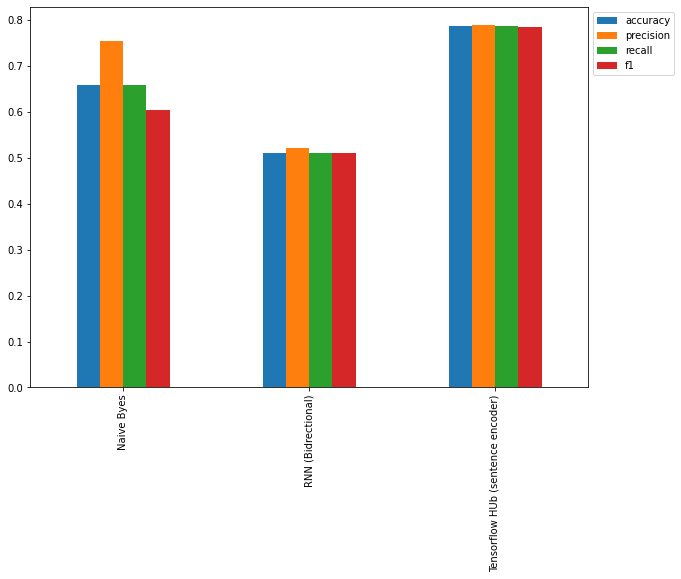

In [56]:
all_model_results["accuracy"] = all_model_results["accuracy"]/100
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

### Testing on Test data

In [ ]:
# Create dataframe with validation sentences and best performing model predictions
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "pred": model_6_preds,
                       "pred_prob": tf.squeeze(model_6_pred_probs)})
val_df.head()

,text,target,pred,pred_prob
0,"This is atrocious. I'm watching ""Life"" on Dis...",1,1.0,0.894817
1,Good luck getting this on once you've filled i...,1,1.0,0.631994
2,I am (as you will read) completely ignorant ab...,1,0.0,0.369202
3,"if you like it or dont, its all good lighthear...",0,0.0,0.256341
4,A lot of important information is given in thi...,0,0.0,0.149372


In [ ]:
# Find the wrong predictions and sort by prediction probabilities
most_wrong = val_df[val_df["target"] != val_df["pred"]].sort_values("pred_prob", 
                                                                    ascending=False)
most_wrong[:10]

,text,target,pred,pred_prob
21,"Works fairly well, just a little dangerous to ...",0,1.0,0.730418
65,Remedy Entertainment announced Alan Wake all t...,0,1.0,0.723996
33,Very disappointed. I have read the entire ser...,0,1.0,0.702521
38,These shoes are great.The other kids that wrot...,0,1.0,0.690776
89,This was an interesting read. Why spend all s...,0,1.0,0.604254
53,"Prior to reading this book, I knew little abou...",0,1.0,0.521251
48,"In The Bush Tragedy, Jacob Weisberg does what ...",0,1.0,0.515828
61,I was a little unsure about this purchase sinc...,0,1.0,0.506749
58,"First off, I researched for days before buying...",0,1.0,0.506646
85,The product description does not indicate that...,1,0.0,0.471947
